In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np

# 데이터 경로
train_csv_path = '/workspace/data/train.csv'
meta_csv_path = '/workspace/data/meta.csv'
train_img_path = '/workspace/data/train'
test_img_path = '/workspace/data/test'


# CSV 불러오기
df_train = pd.read_csv(train_csv_path)
df_meta = pd.read_csv(meta_csv_path)

print(df_train.head())
print(df_meta.head())



                     ID  target
0  002f99746285dfdd.jpg      16
1  008ccd231e1fea5d.jpg      10
2  008f5911bfda7695.jpg      10
3  009235e4c9c07af5.jpg       4
4  00b2f44967580c74.jpg      16
   target                                         class_name
0       0                                     account_number
1       1  application_for_payment_of_pregnancy_medical_e...
2       2                                      car_dashboard
3       3            confirmation_of_admission_and_discharge
4       4                                          diagnosis


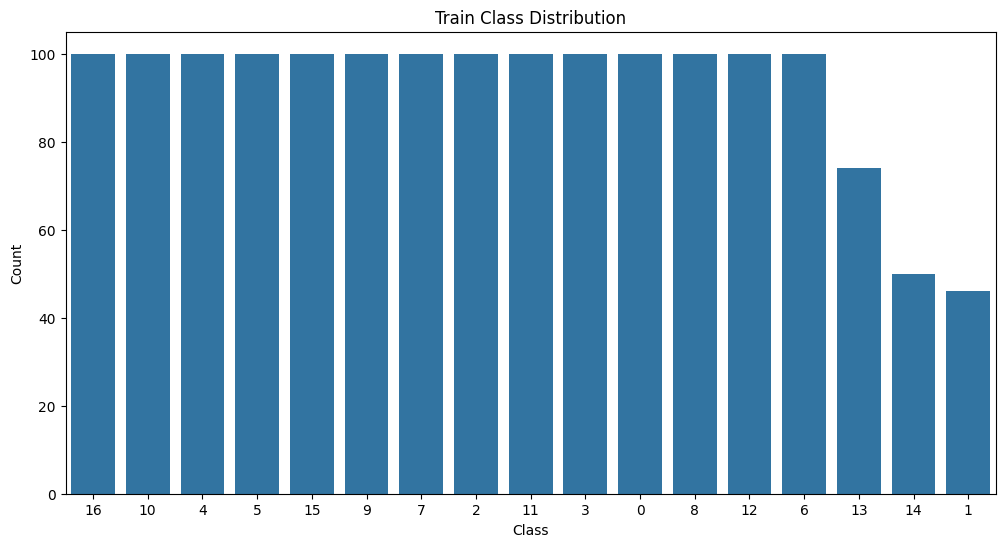

In [8]:
# 클래스별 개수 시각화
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, x='target', order=df_train['target'].value_counts().index)
plt.title('Train Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

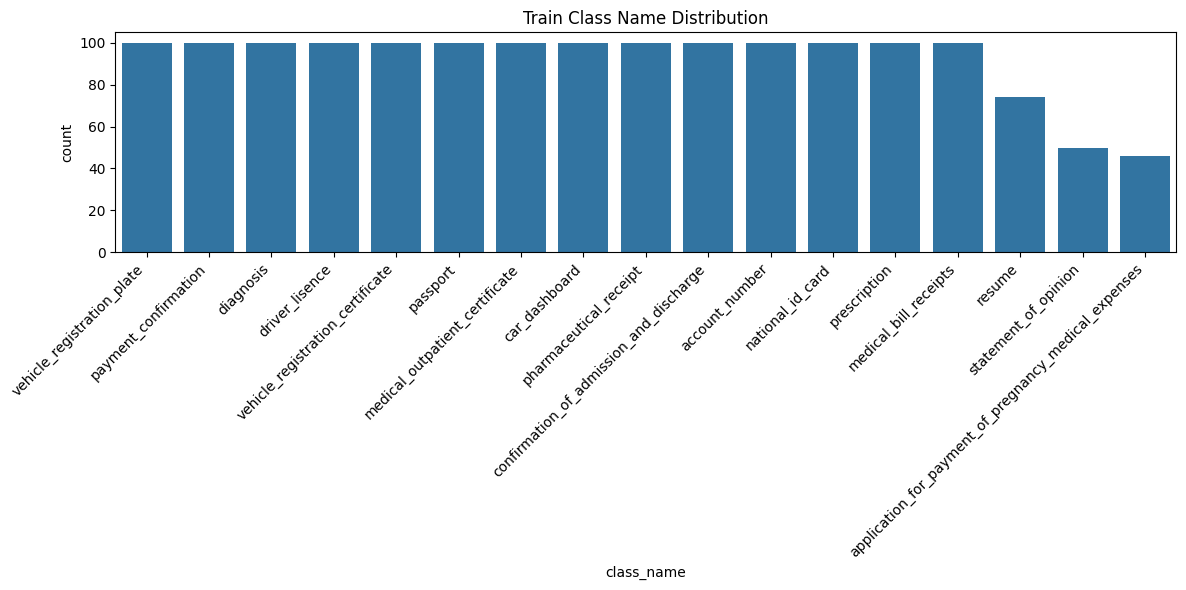

In [9]:
# 클래스 이름과 매핑
class_mapping = dict(zip(df_meta['target'], df_meta['class_name']))
df_train['class_name'] = df_train['target'].map(class_mapping)

# 클래스 이름으로도 확인
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, x='class_name', order=df_train['class_name'].value_counts().index)
plt.title('Train Class Name Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

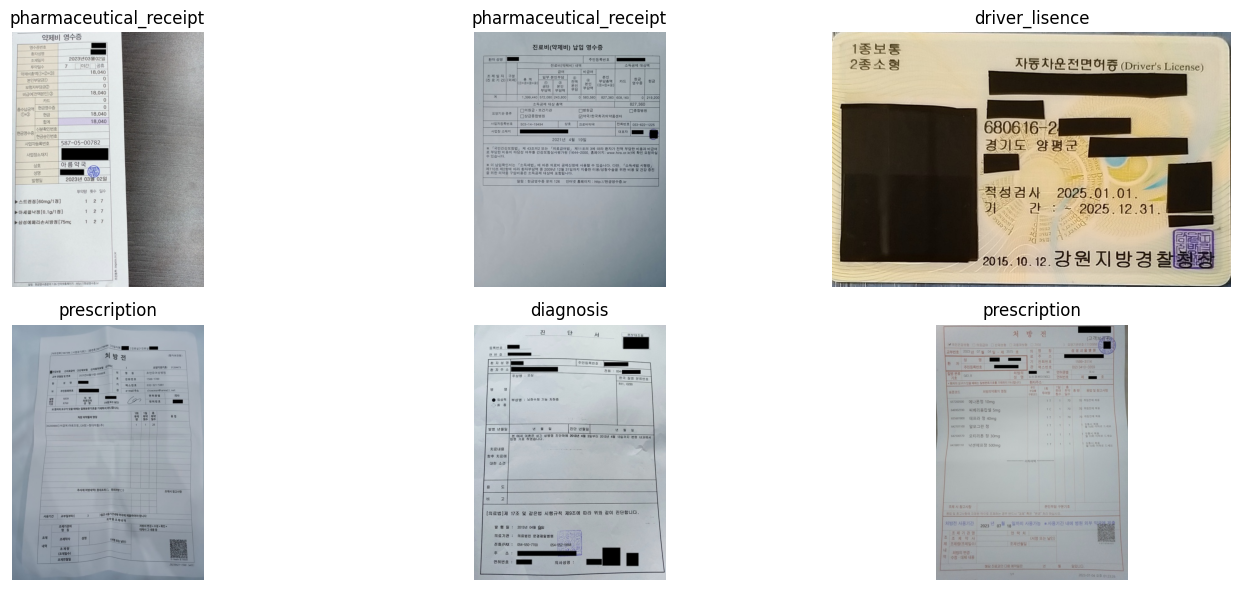

In [11]:
import random

def show_random_images(df, img_dir, n=6):
    samples = df.sample(n)
    plt.figure(figsize=(15, 6))
    for i, (img_id, label) in enumerate(zip(samples['ID'], samples['class_name'])):
        img = Image.open(os.path.join(img_dir, img_id))
        plt.subplot(2, 3, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(label)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_random_images(df_train, train_img_path)

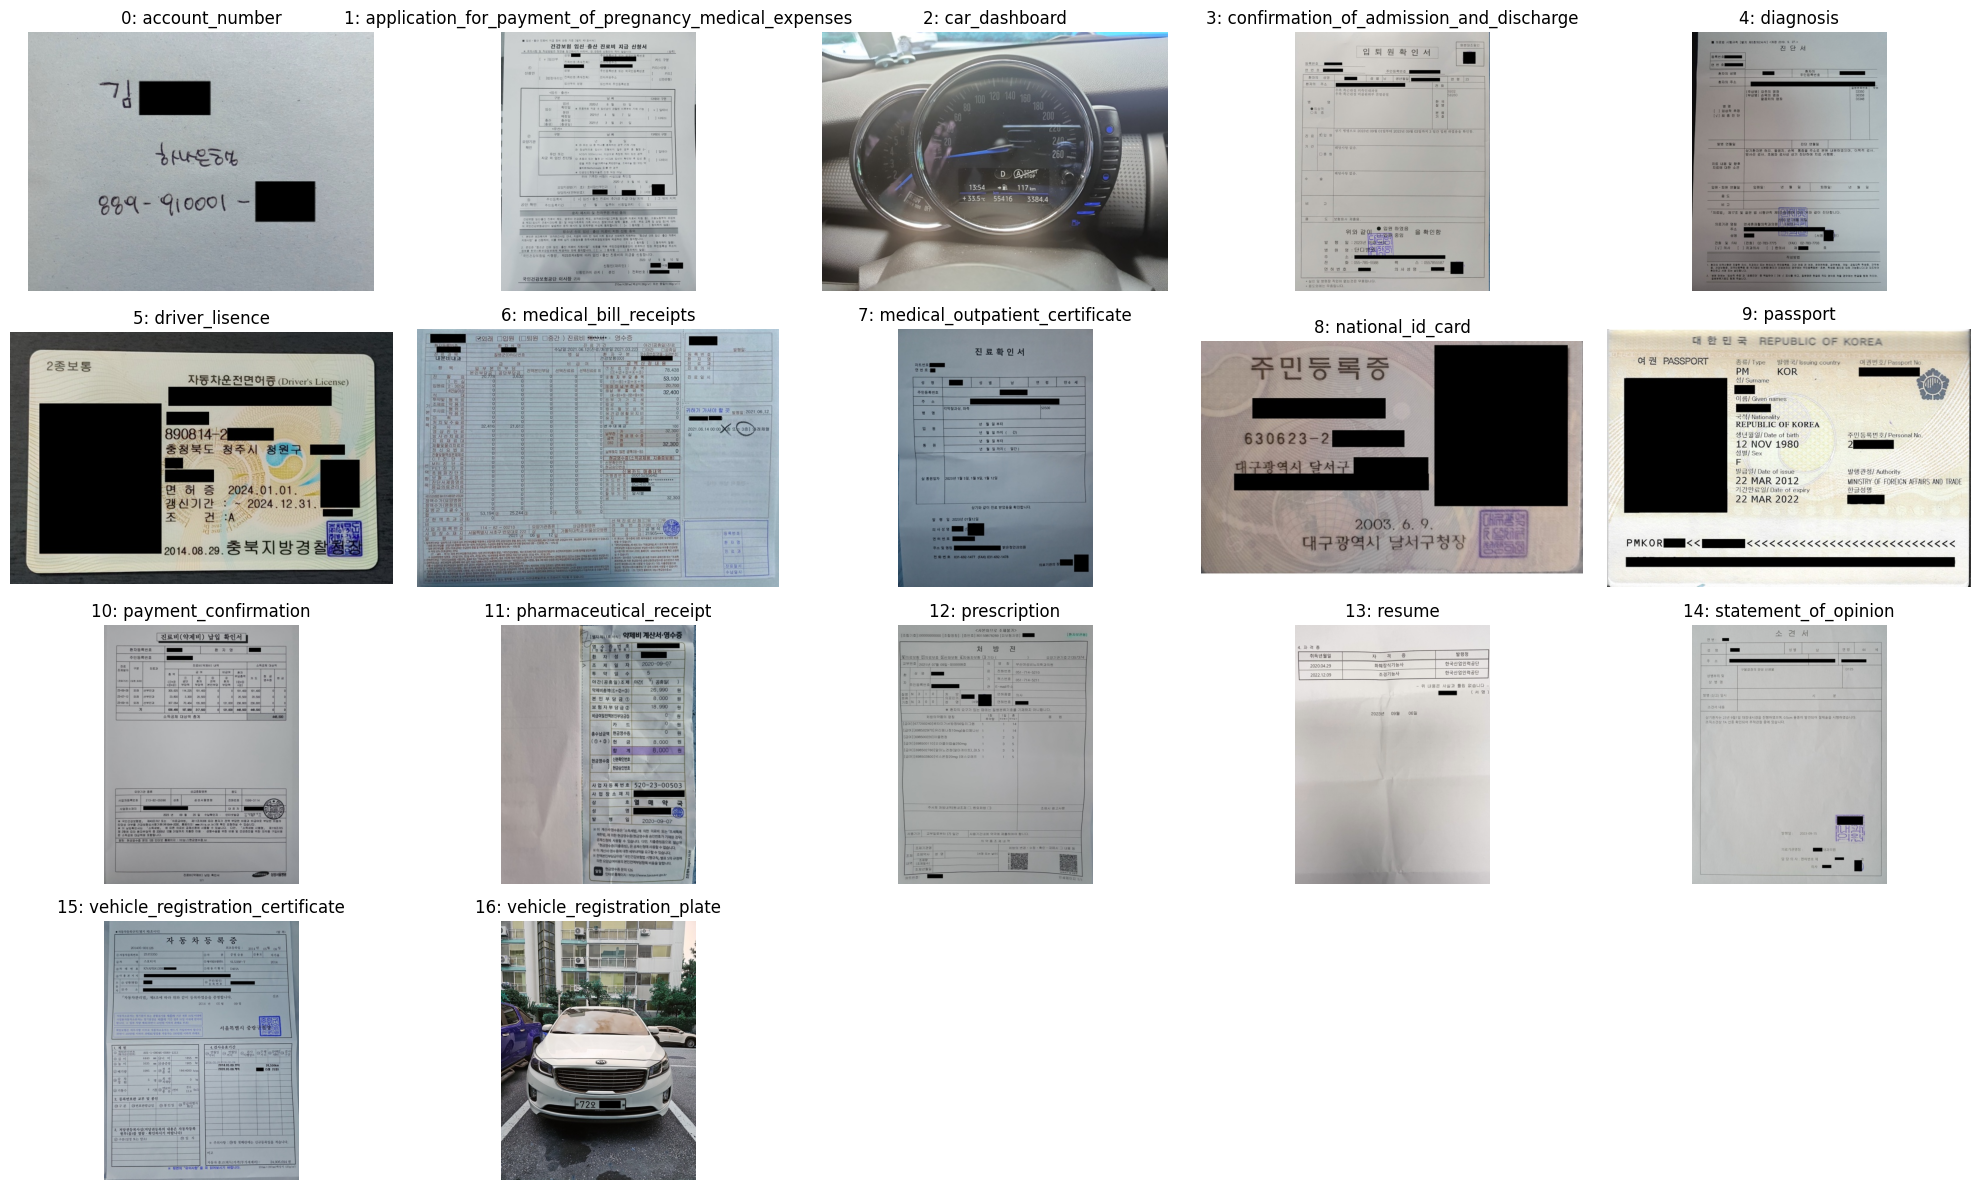

In [14]:
def show_one_per_class(df, img_dir):
    plt.figure(figsize=(20, 12))
    for i in range(17):
        sample = df[df['target'] == i].iloc[0]
        img = Image.open(os.path.join(img_dir, sample['ID']))
        plt.subplot(4, 5, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{i}: {class_mapping[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_one_per_class(df_train, train_img_path)

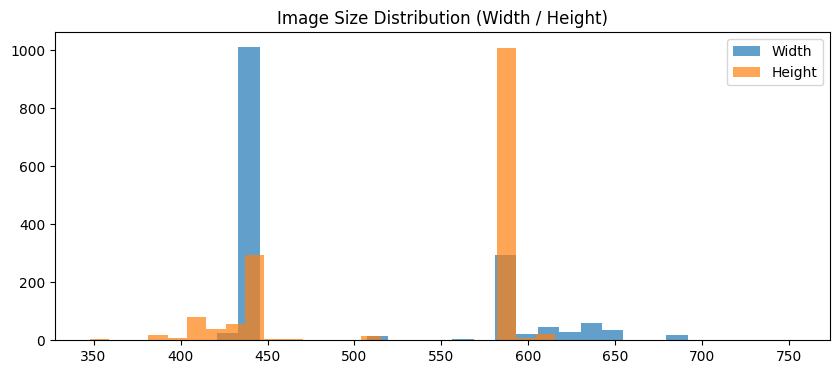

In [15]:
def get_image_sizes(df, img_dir):
    sizes = []
    for img_id in df['ID']:
        img = Image.open(os.path.join(img_dir, img_id))
        sizes.append(img.size)  # (width, height)
    return sizes

sizes = get_image_sizes(df_train, train_img_path)
widths, heights = zip(*sizes)

plt.figure(figsize=(10, 4))
plt.hist(widths, bins=30, alpha=0.7, label='Width')
plt.hist(heights, bins=30, alpha=0.7, label='Height')
plt.legend()
plt.title('Image Size Distribution (Width / Height)')
plt.show()

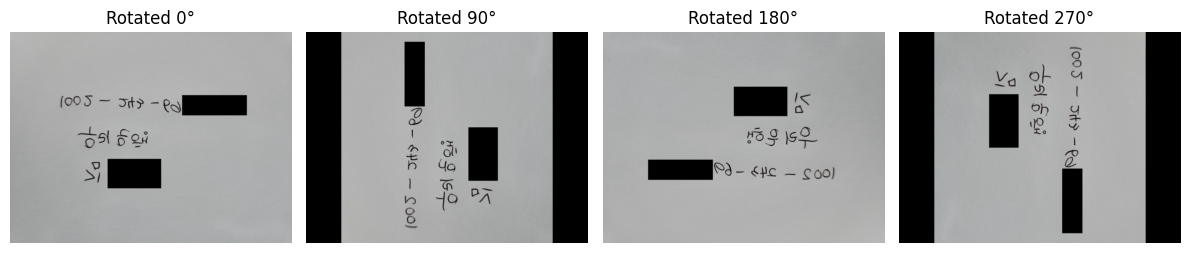

In [21]:
def show_rotated_images(img_path):
    img = Image.open(img_path)
    angles = [0, 90, 180, 270]
    plt.figure(figsize=(12, 3))
    for i, angle in enumerate(angles):
        rotated = img.rotate(angle)
        plt.subplot(1, 4, i+1)
        plt.imshow(rotated, cmap='gray')
        plt.title(f"Rotated {angle}°")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

sample_img = os.path.join(test_img_path, random.choice(os.listdir(test_img_path)))
show_rotated_images(sample_img)


- ### 이미지 사이즈 별 빈도수

In [27]:
from PIL import Image
import os
from collections import Counter

# 이미지 크기 정보 수집 함수
def collect_image_sizes(img_dir, df):
    size_list = []
    for img_name in df['ID']:
        img_path = os.path.join(img_dir, img_name)
        with Image.open(img_path) as img:
            size_list.append(img.size)  # (width, height)
    return size_list

# 실행
img_sizes = collect_image_sizes(train_img_path, df_train)

# 빈도수 집계
size_counter = Counter(img_sizes)

# 가장 자주 등장하는 해상도 Top 10 출력
print("가장 흔한 이미지 해상도 Top 10:")
for size, count in size_counter.most_common(10):
    print(f"{size[0]}x{size[1]} : {count}장")


가장 흔한 이미지 해상도 Top 10:
443x591 : 1004장
591x443 : 282장
682x384 : 18장
608x430 : 10장
643x407 : 8장
641x408 : 7장
644x406 : 6장
512x512 : 6장
634x413 : 6장
638x410 : 5장


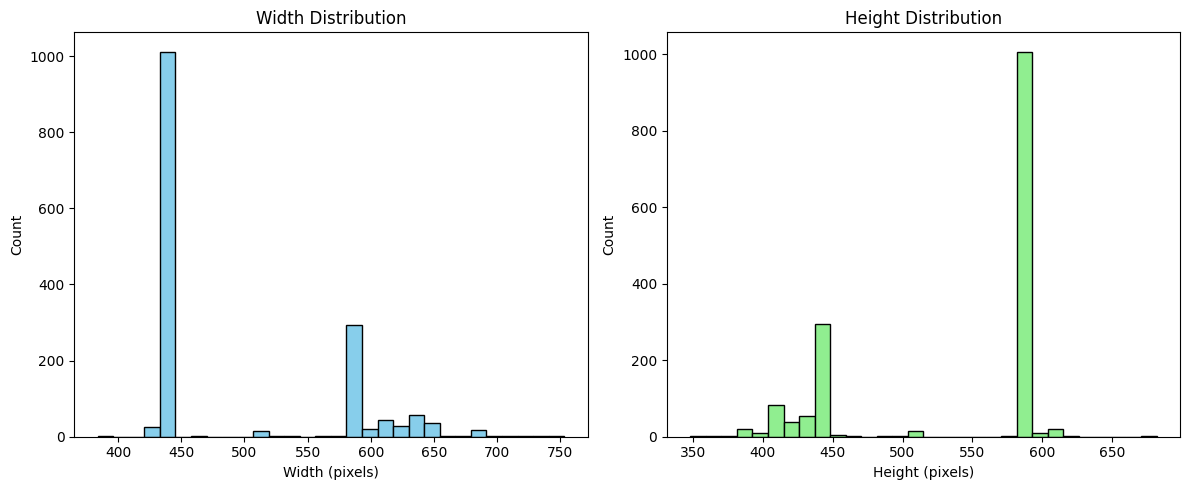

In [26]:
import matplotlib.pyplot as plt

# 시각화를 위한 전처리
widths, heights = zip(*img_sizes)

plt.figure(figsize=(12, 5))

# 가로 길이 분포
plt.subplot(1, 2, 1)
plt.hist(widths, bins=30, color='skyblue', edgecolor='black')
plt.title('Width Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Count')

# 세로 길이 분포
plt.subplot(1, 2, 2)
plt.hist(heights, bins=30, color='lightgreen', edgecolor='black')
plt.title('Height Distribution')
plt.xlabel('Height (pixels)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [28]:
from collections import defaultdict

# 클래스별 이미지 크기 저장
class_size_dict = defaultdict(list)

for _, row in df_train.iterrows():
    img_path = os.path.join(train_img_path, row['ID'])
    target = row['target']
    with Image.open(img_path) as img:
        size = img.size  # (width, height)
        class_size_dict[target].append(size)


In [29]:
# 클래스 이름 매핑
class_mapping = dict(zip(df_meta['target'], df_meta['class_name']))

print("📏 클래스별 평균 이미지 해상도:")
for target, sizes in class_size_dict.items():
    widths = [s[0] for s in sizes]
    heights = [s[1] for s in sizes]
    avg_w, avg_h = sum(widths) / len(widths), sum(heights) / len(heights)
    print(f"{target:2d} ({class_mapping[target][:30]:>30}) ➜ 평균 크기: {int(avg_w)}x{int(avg_h)}  (샘플 수: {len(sizes)})")


📏 클래스별 평균 이미지 해상도:
16 (    vehicle_registration_plate) ➜ 평균 크기: 475x558  (샘플 수: 100)
10 (          payment_confirmation) ➜ 평균 크기: 443x591  (샘플 수: 100)
 4 (                     diagnosis) ➜ 평균 크기: 443x591  (샘플 수: 100)
 5 (                driver_lisence) ➜ 평균 크기: 611x431  (샘플 수: 100)
15 (vehicle_registration_certifica) ➜ 평균 크기: 444x589  (샘플 수: 100)
14 (          statement_of_opinion) ➜ 평균 크기: 443x591  (샘플 수: 50)
 9 (                      passport) ➜ 평균 크기: 608x432  (샘플 수: 100)
13 (                        resume) ➜ 평균 크기: 443x590  (샘플 수: 74)
 7 (medical_outpatient_certificate) ➜ 평균 크기: 443x591  (샘플 수: 100)
11 (        pharmaceutical_receipt) ➜ 평균 크기: 519x514  (샘플 수: 100)
 2 (                 car_dashboard) ➜ 평균 크기: 588x445  (샘플 수: 100)
 8 (              national_id_card) ➜ 평균 크기: 613x430  (샘플 수: 100)
12 (                  prescription) ➜ 평균 크기: 443x591  (샘플 수: 100)
 3 (confirmation_of_admission_and_) ➜ 평균 크기: 443x591  (샘플 수: 100)
 0 (                account_number) ➜ 평균 크기: 482x551  (샘플 수

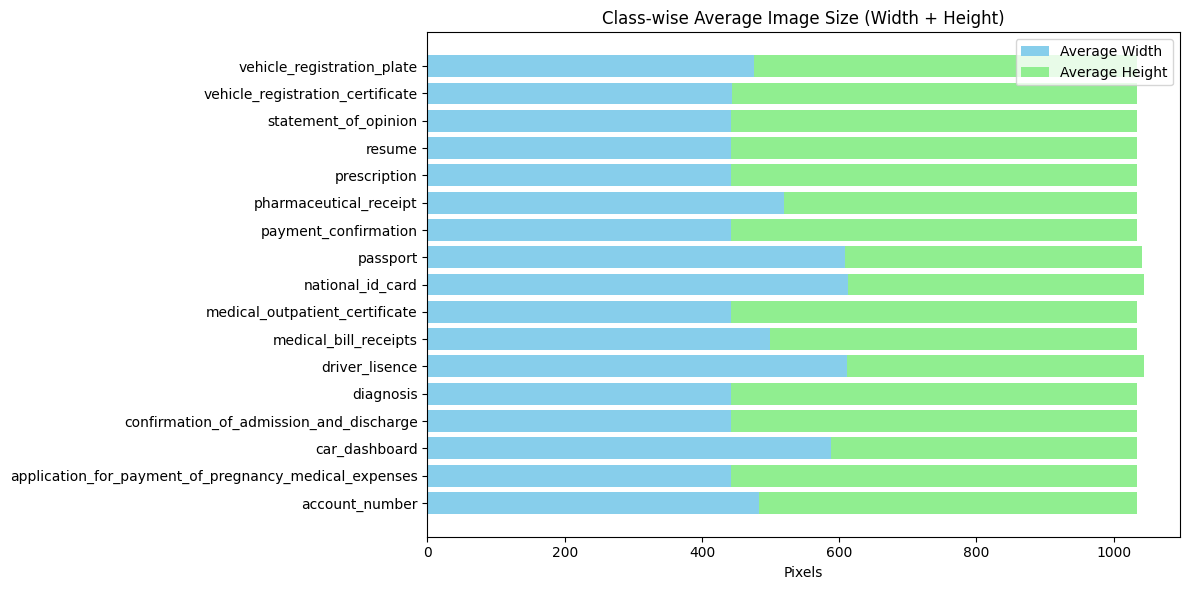

In [30]:
import matplotlib.pyplot as plt

# 데이터 준비
avg_widths = []
avg_heights = []
labels = []

for target in sorted(class_size_dict.keys()):
    sizes = class_size_dict[target]
    widths = [s[0] for s in sizes]
    heights = [s[1] for s in sizes]
    avg_widths.append(sum(widths)/len(widths))
    avg_heights.append(sum(heights)/len(heights))
    labels.append(class_mapping[target])

# 시각화
plt.figure(figsize=(12, 6))
plt.barh(labels, avg_widths, color='skyblue', label='Average Width')
plt.barh(labels, avg_heights, left=avg_widths, color='lightgreen', label='Average Height')
plt.xlabel('Pixels')
plt.title('Class-wise Average Image Size (Width + Height)')
plt.legend()
plt.tight_layout()
plt.show()


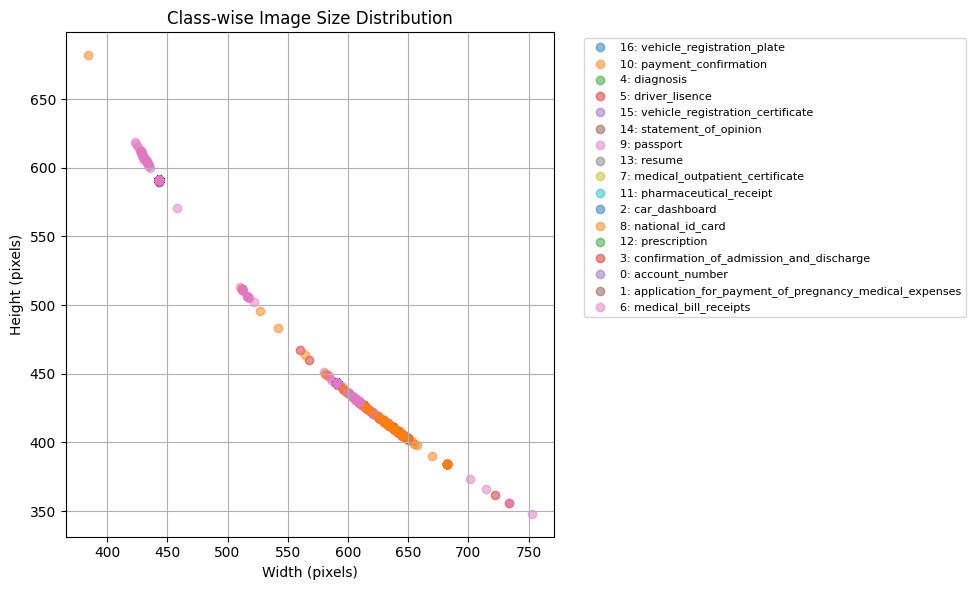

In [31]:
plt.figure(figsize=(10, 6))

for target, sizes in class_size_dict.items():
    widths = [s[0] for s in sizes]
    heights = [s[1] for s in sizes]
    plt.scatter(widths, heights, label=f"{target}: {class_mapping[target]}", alpha=0.5)

plt.title('Class-wise Image Size Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.legend(fontsize=8, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
from collections import defaultdict, Counter

# 클래스별 해상도 Counter 저장할 딕셔너리
class_resolution_counter = defaultdict(Counter)

# 해상도 빈도수 계산
for _, row in df_train.iterrows():
    target = row['target']
    img_path = os.path.join(train_img_path, row['ID'])
    with Image.open(img_path) as img:
        size = img.size  # (width, height)
        class_resolution_counter[target][size] += 1


In [33]:
# 클래스 이름 매핑
class_mapping = dict(zip(df_meta['target'], df_meta['class_name']))

# 해상도 분포 출력
for target in sorted(class_resolution_counter.keys()):
    print(f"\n📄 클래스 {target}: {class_mapping[target]}")
    for (w, h), count in class_resolution_counter[target].most_common():
        print(f"  {w}x{h}  :  {count}장")



📄 클래스 0: account_number
  443x591  :  72장
  591x443  :  27장
  443x590  :  1장

📄 클래스 1: application_for_payment_of_pregnancy_medical_expenses
  443x591  :  46장

📄 클래스 2: car_dashboard
  591x443  :  98장
  443x591  :  2장

📄 클래스 3: confirmation_of_admission_and_discharge
  443x591  :  100장

📄 클래스 4: diagnosis
  443x591  :  100장

📄 클래스 5: driver_lisence
  591x443  :  21장
  443x591  :  6장
  638x410  :  4장
  641x408  :  4장
  637x411  :  4장
  646x405  :  3장
  642x407  :  3장
  643x407  :  3장
  682x384  :  3장
  629x416  :  2장
  626x418  :  2장
  639x409  :  2장
  613x427  :  2장
  620x422  :  2장
  644x406  :  2장
  650x403  :  2장
  512x512  :  2장
  590x443  :  2장
  633x414  :  1장
  568x460  :  1장
  636x412  :  1장
  597x438  :  1장
  634x412  :  1장
  650x402  :  1장
  610x429  :  1장
  645x406  :  1장
  608x430  :  1장
  649x403  :  1장
  642x408  :  1장
  630x415  :  1장
  634x413  :  1장
  560x467  :  1장
  614x426  :  1장
  647x404  :  1장
  734x356  :  1장
  647x405  :  1장
  632x414  :  1장
  618x423  :  1장
 

### 정리
#### 해상도 고정: 
- 클래스 1: application_for_payment_of_pregnancy_medical_expenses (임신 출산 진료비 지급 신청서)
- 클래스 3: confirmation_of_admission_and_discharge (입퇴원 확인서)
- 클래스 4: diagnosis (진단서)
- 클래스 7: medical_outpatient_certificate (외래 증명서)
- 클래스 10: payment_confirmation (결제 증명서)
- 클래스 12: prescription (처방전)
- 클래스 14: statement_of_opinion (의견서)

#### 해상도 다양:
- 클래스 5: driver_lisence (운전면허증)
- 클래스 6: medical_bill_receipts (의료 영수증)
- 클래스 8: national_id_card (주민등록증)
- 클래스 9: passport (여권)

#### 나머지:
- 클래스 0: account_number  -> 3 가지 (계좌번호)
- 클래스 2: car_dashboard   -> 2 가지 (자동차 대시보드)
- 클래스 11: pharmaceutical_receipt -> 2 가지 (약국 영수증)
- 클래스 13: resume -> 2 가지 (이력서)
- 클래스 15: vehicle_registration_certificate -> 3 가지 (차량 등록증)
- 클래스 16: vehicle_registration_plate -> 2 가지 (자동차 번호판)

#### 전략:
- Resize
- 클래스 5,6,8,9 padding처리
- TTA

## Test 데이터 셋 EDA

In [34]:
from collections import Counter
from PIL import Image
import os

# test 이미지 해상도 수집
def get_test_image_sizes(test_img_path):
    sizes = []
    for img_name in os.listdir(test_img_path):
        img_path = os.path.join(test_img_path, img_name)
        with Image.open(img_path) as img:
            sizes.append(img.size)  # (width, height)
    return sizes

# 실행
test_sizes = get_test_image_sizes(test_img_path)
test_size_counter = Counter(test_sizes)


In [35]:
print("📦 test 이미지 해상도 Top 20")
for (w, h), count in test_size_counter.most_common(20):
    print(f"{w}x{h} : {count}장")


📦 test 이미지 해상도 Top 20
443x591 : 1342장
591x443 : 1270장
512x512 : 22장
430x608 : 20장
608x430 : 12장
639x409 : 8장
682x384 : 8장
417x627 : 8장
384x682 : 8장
413x634 : 7장
642x408 : 7장
646x405 : 7장
634x413 : 7장
648x404 : 6장
428x611 : 6장
645x406 : 6장
611x428 : 6장
409x640 : 6장
443x590 : 6장
407x643 : 6장


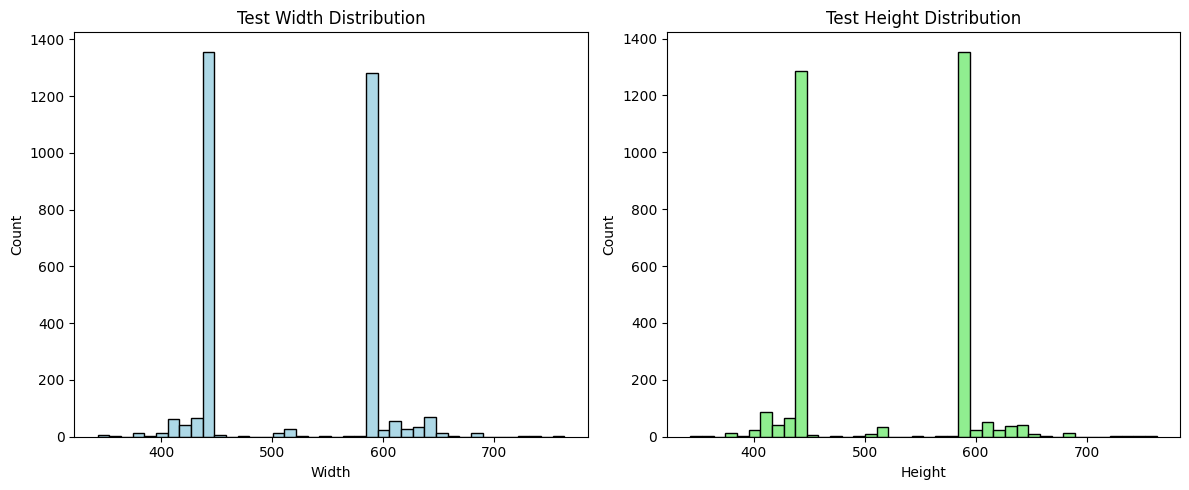

In [36]:
import matplotlib.pyplot as plt

# 너비, 높이 분리
test_widths, test_heights = zip(*test_sizes)

plt.figure(figsize=(12, 5))

# 너비 분포
plt.subplot(1, 2, 1)
plt.hist(test_widths, bins=40, color='lightblue', edgecolor='black')
plt.title('Test Width Distribution')
plt.xlabel('Width')
plt.ylabel('Count')

# 높이 분포
plt.subplot(1, 2, 2)
plt.hist(test_heights, bins=40, color='lightgreen', edgecolor='black')
plt.title('Test Height Distribution')
plt.xlabel('Height')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


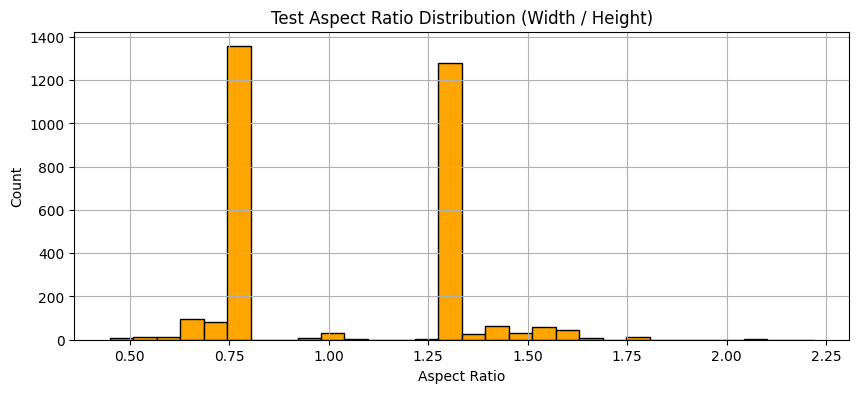

In [37]:
# 비율 계산 (소숫점 2자리까지)
aspect_ratios = [round(w / h, 2) for w, h in test_sizes]

plt.figure(figsize=(10, 4))
plt.hist(aspect_ratios, bins=30, color='orange', edgecolor='black')
plt.title('Test Aspect Ratio Distribution (Width / Height)')
plt.xlabel('Aspect Ratio')
plt.ylabel('Count')
plt.grid(True)
plt.show()


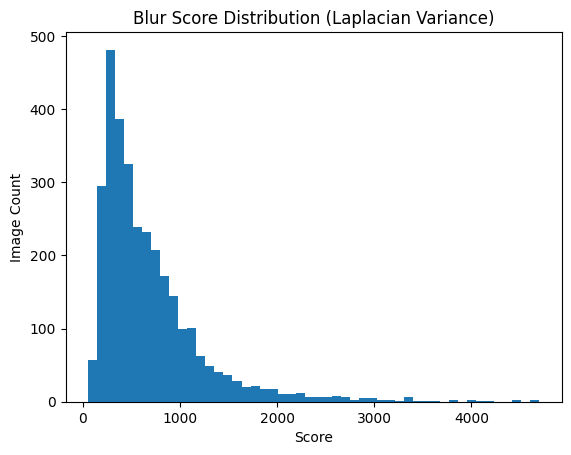

In [40]:
import cv2
import numpy as np

def estimate_blur(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return -1
    lap = cv2.Laplacian(img, cv2.CV_64F).var()
    return lap  # 낮을수록 blur

blur_scores = []
for img_name in os.listdir(test_img_path):
    path = os.path.join(test_img_path, img_name)
    blur_scores.append(estimate_blur(path))

plt.hist(blur_scores, bins=50)
plt.title("Blur Score Distribution (Laplacian Variance)")
plt.xlabel("Score")
plt.ylabel("Image Count")
plt.show()
